# Exploratory data analysis


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hi\Documents\Australian_Weather.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape # The dataset has 23 features and 145460 entries

(145460, 23)

In [10]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.isnull().sum() # Almost 40% of the entries are not known for the columns Evaporation,Sunshine,Cloud9am and Cloud3pm columns

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.describe() # We can clearly see that there are outliers in the rainfall column

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<AxesSubplot:>

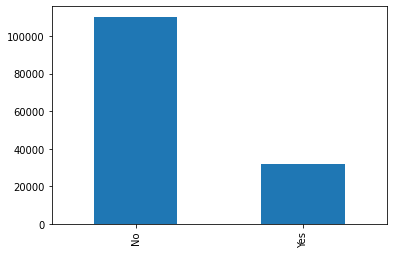

In [27]:
df["RainToday"].value_counts().plot(kind='bar') #Majority of the forecast says no rain

In [10]:
df["RainTomorrow"].value_counts() #ALmost identical to Rain Today Column

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [112]:
len(df[df["Rainfall"]!=0]) #There is rainfall on 54380 out of 145460

54380

In [117]:
len(df[(df["Rainfall"]!=0) & (df["RainToday"]==1)]) #The weather forecast is correct on 31880 occasions out of 54380

31880

In [9]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
df["Location"].nunique() #We have 49 different locations

49

In [53]:
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")

In [14]:
df["Date"].dt.month.unique()  #Every month's data is studied

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [15]:
df["Date"].dt.day.unique() #Each day's data is studied

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [16]:
df["Date"].dt.year.unique() # Data from the year 2007 to the year 2017 is taken into consideration

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

In [23]:
df1=df[df["Location"]=="Albury"]

In [24]:
df1["Date"].dt.year.unique() # Data for 2007 is not taken into acccount for all the locations 

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [25]:
df2=df[df['Date'].dt.year==2007]

In [26]:
df2["Location"].unique()  # The year 2007 is only considered for the location canberra

array(['Canberra'], dtype=object)

In [27]:
df3=df[df['Date'].dt.year==2017]

In [29]:
df3["Location"].nunique() # 2017 is considered for every location

49

In [33]:
df["Location"].value_counts() # We can see that not every day of the month and year are considered for all the locations

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [4]:
df4=df.select_dtypes(exclude="object")
df4.shape

(145460, 16)

<AxesSubplot:>

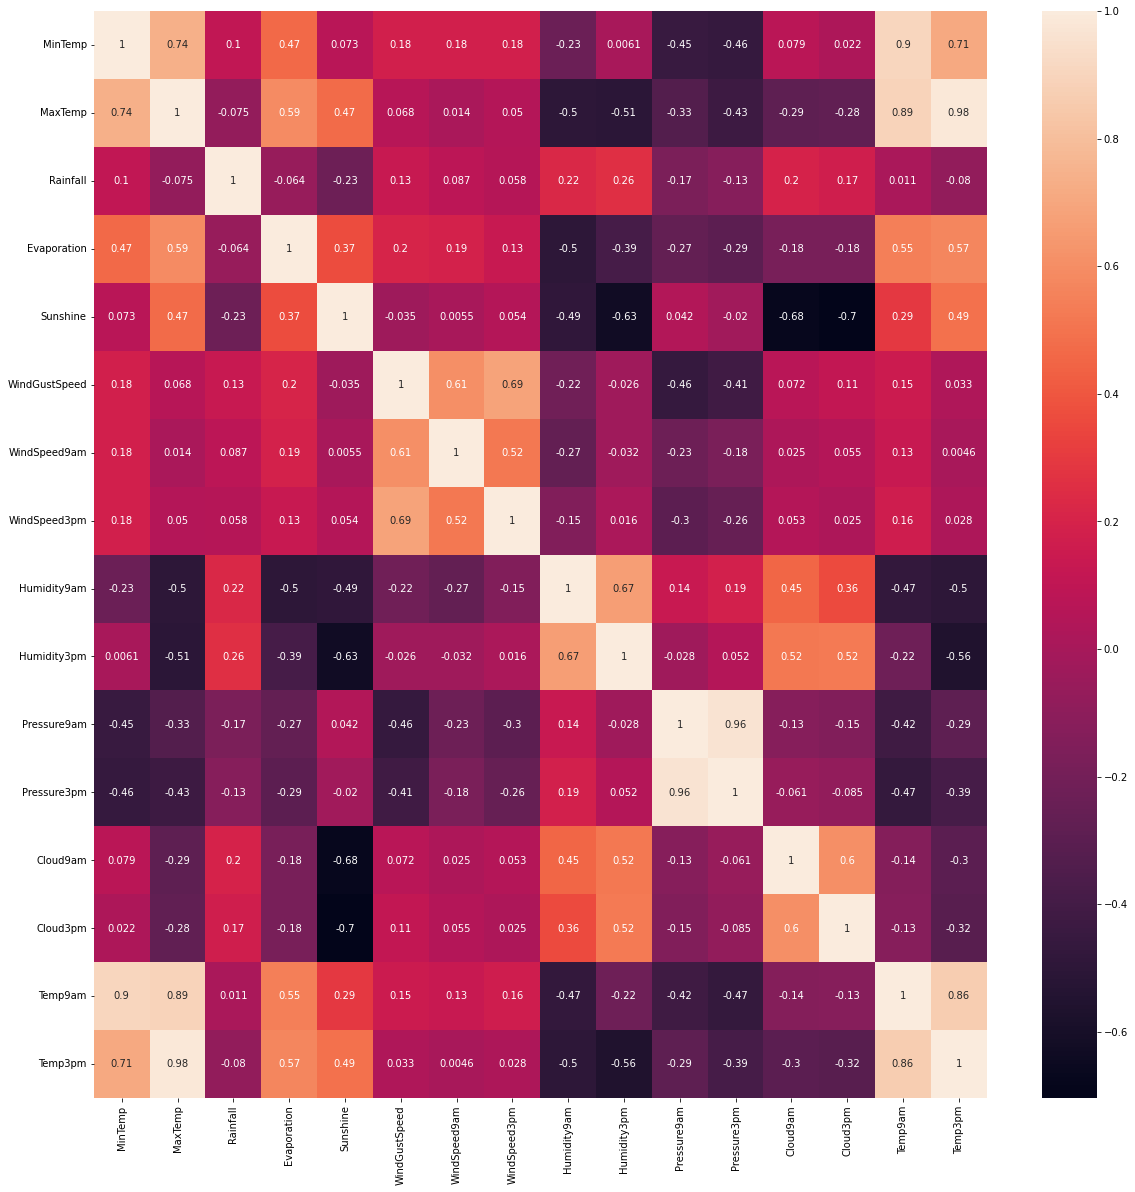

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corelation=df4.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corelation,xticklabels=df4.columns,yticklabels=df4.columns,annot=True)

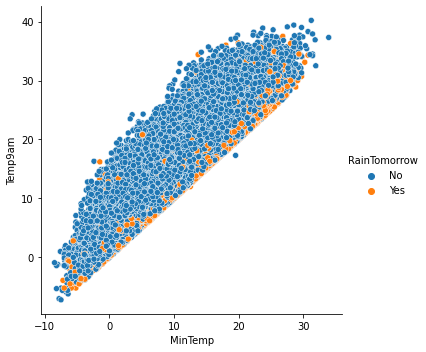

In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hi\Documents\Australian_Weather.csv")
sns.relplot(x="MinTemp",y="Temp9am",hue="RainTomorrow",data=df)

# Feature Engineering

## One Hot Encoding

In [44]:
df['RainToday']=df['RainToday'].replace('No',0)
df['RainToday']=df['RainToday'].replace('Yes',1)
df['RainTomorrow']=df['RainTomorrow'].replace('No',0)
df['RainTomorrow']=df['RainTomorrow'].replace('Yes',1)


In [45]:
def encode_data(c):

    ''' 

    This function takes c as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    m = {}

    unique = list(df[c].unique())

    for i in range(len(unique)):

        m[unique[i]] = i

    return m
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
df['Location'].replace(encode_data('Location'),inplace = True)
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,0,13.4,22.9,0.6,NaN,NaN,0,44.0,0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,02-12-2008,0,7.4,25.1,0.0,NaN,NaN,1,44.0,1,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,03-12-2008,0,12.9,25.7,0.0,NaN,NaN,2,46.0,0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,04-12-2008,0,9.2,28.0,0.0,NaN,NaN,3,24.0,2,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,05-12-2008,0,17.5,32.3,1.0,NaN,NaN,0,41.0,3,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,48,2.8,23.4,0.0,NaN,NaN,15,31.0,2,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,22-06-2017,48,3.6,25.3,0.0,NaN,NaN,4,22.0,2,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,23-06-2017,48,5.4,26.9,0.0,NaN,NaN,5,37.0,2,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,24-06-2017,48,7.8,27.0,0.0,NaN,NaN,13,28.0,5,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


## Outlier Treatment 

In [48]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

## Filling Null values

In [37]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [50]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']

numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)




In [90]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
df[categorical_features].isnull().sum()
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [51]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,0,13.4,22.900000,0.6,5.468232,7.611178,0,44.00000,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.000000
1,02-12-2008,0,7.4,25.100000,0.0,5.468232,7.611178,1,44.00000,1,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.000000
2,03-12-2008,0,12.9,25.700000,0.0,5.468232,7.611178,2,46.00000,0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.000000
3,04-12-2008,0,9.2,28.000000,0.0,5.468232,7.611178,3,24.00000,2,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.000000
4,05-12-2008,0,17.5,32.300000,1.0,5.468232,7.611178,0,41.00000,3,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,48,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,2,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.000000
145456,22-06-2017,48,3.6,25.300000,0.0,5.468232,7.611178,4,22.00000,2,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.000000
145457,23-06-2017,48,5.4,26.900000,0.0,5.468232,7.611178,5,37.00000,2,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.000000
145458,24-06-2017,48,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,5,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.000000


## Creating Month column

In [32]:
conditions = [
    (df['Date'].dt.month == 1),
    (df['Date'].dt.month == 2), (df['Date'].dt.month == 3),
    (df['Date'].dt.month == 4), (df['Date'].dt.month == 5),
    (df['Date'].dt.month == 6),(df['Date'].dt.month == 7),
    (df['Date'].dt.month == 8), (df['Date'].dt.month == 9),
    (df['Date'].dt.month == 10), (df['Date'].dt.month == 11),
    (df['Date'].dt.month == 12)
    ]

# create a list of the values we want to assign for each condition
values = ['January','February','March','April','May','June','July','August','September','October','November','December']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Month'] = np.select(conditions, values)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,0,13.4,22.900000,0.6,5.468232,7.611178,0,44.00000,0,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0,December
1,2008-12-02,0,7.4,25.100000,0.0,5.468232,7.611178,1,44.00000,1,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0,December
2,2008-12-03,0,12.9,25.700000,0.0,5.468232,7.611178,2,46.00000,0,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0,December
3,2008-12-04,0,9.2,28.000000,0.0,5.468232,7.611178,3,24.00000,2,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0,December
4,2008-12-05,0,17.5,32.300000,1.0,5.468232,7.611178,0,41.00000,3,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,48,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,2,...,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0,June
145456,2017-06-22,48,3.6,25.300000,0.0,5.468232,7.611178,4,22.00000,2,...,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0,June
145457,2017-06-23,48,5.4,26.900000,0.0,5.468232,7.611178,5,37.00000,2,...,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0,June
145458,2017-06-24,48,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,5,...,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0,June


### Dropping date column due to high cardinality

In [56]:
df["Year"]=df["Date"].dt.year
df["day"]=df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)


## Identification of rainy season for each location

In [103]:
df0=df[df["Rainfall"]!=0]
Location_list=list(set(df.Location))
df_full=pd.DataFrame()
df_temp=pd.DataFrame()

def concatenate_loop_dfs(df_temp, df_full, axis=0):
    """
    to avoid retyping the same line of code for every df.
    the parameters should be the temporary df created at each loop and the concatenated DF that will contain all
    values which must first be initialized (outside the loop). """ 
    if df_full.empty:
      df_full = df_temp
    else:
      df_full = pd.concat([df_full, df_temp], axis=axis)
    return df_full
df_final = pd.DataFrame()
for Location in Location_list:
    # The query function does a search for where
    # the @Location means the external variable, in this case the input from loop
    # then you'll have a temporary DF with only the year and sorting and getting top3
    df2 = df.query("Location == @Location")

    df_temp = df2.groupby(['Location','Month'])["Rainfall","Date"].sum().sort_values(by="Rainfall", ascending=False).head(3)
    # finally you'll call our function that will keep concating the tmp DFs
    df_final = concatenate_loop_dfs(df_temp, df_final)
df_final

C:\Users\hi\AppData\Local\Temp/ipykernel_16096/2467954185.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp = df2.groupby(['Location','Month'])["Rainfall","Date"].sum().sort_values(by="Rainfall", ascending=False).head(3)


Rainfall
Location   Month              
Ballarat   September     624.0
           August        553.6
           July          541.6
Richmond   March         892.6
           January       850.0
...                        ...
Portland   June         1037.0
           August        994.4
PearceRAAF July          837.4
           August        785.3
           June          638.7

[147 rows x 1 columns]

In [86]:
df0["Rainfall"][(df0["Location"]=="Ballarat")&(df0["Month"]=="September")].sum()# Checking the result

624.0

In [104]:
df_final.iloc[0:60,0]

Location          Month    
Ballarat          September     624.0
                  August        553.6
                  July          541.6
Richmond          March         892.6
                  January       850.0
                  February      812.4
PerthAirport      August        932.8
                  July          913.6
                  June          810.4
SydneyAirport     June         1326.2
                  March        1128.8
                  April        1094.0
Mildura           February      322.2
                  January       307.6
                  December      290.6
Launceston        August        805.3
                  July          708.6
                  June          658.3
AliceSprings      January       607.8
                  December      449.0
                  February      420.4
MelbourneAirport  November      582.4
                  September     443.6
                  October       422.2
Albury            March         580.0
                  July

In [134]:
df_final.iloc[60:120,0]

Location       Month    
Albany         June         1024.9
               July          952.1
               August        936.3
Brisbane       January      1783.8
               March        1282.4
               December     1128.8
NorahHead      June         1501.6
               March        1179.0
               May          1018.2
Moree          January       733.2
               February      559.6
               November      502.0
Darwin         January      4081.0
               February     3782.4
               December     2638.6
Perth          July         1199.8
               June          955.2
               August        914.8
Uluru          December      308.8
               February      152.4
               May           149.0
Nhil           June          232.0
               May           198.2
               September     175.4
Dartmoor       July          896.8
               August        867.4
               June          784.2
MountGambier   July          9

## Feature Significance

<AxesSubplot:>

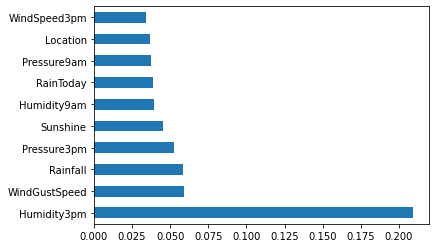

In [57]:

X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')


<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

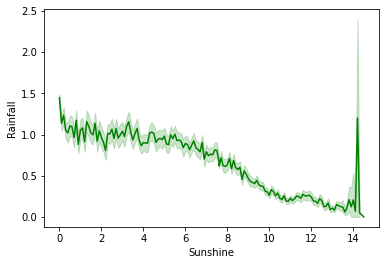

In [71]:
import seaborn as sns
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')#Rainfall is inversy proportional to Sunshine

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

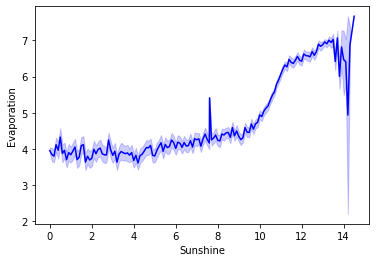

In [72]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')#Sunshine is proportional to Evaporation feature

## Splitting data into training and testing set

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


## Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Model Building

In [101]:
y_train.replace({0.224181,0},inplace=True)
y_train=y_train.astype(int)

In [107]:
y_test.replace({0.224181,0},inplace=True)
y_test=y_test.astype(int)

In [118]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Accuracy Score

In [108]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8406778495806407


In [109]:
print("Train Data Score: {}".format(clr.score(X_train, y_train)))
print("Test Data Score: {}".format(clr.score(X_test, y_test)))
# The accuracy Score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting. 

Train Data Score: 0.840308332187543
Test Data Score: 0.8406778495806407


## Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[21572  1154]
 [ 3481  2885]]


## Classification Report

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.45      0.55      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



## Cross validation

In [114]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clr, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.83921973 0.84162585 0.84270001 0.83852533 0.83831049]
Average cross-validation score: 0.8400762811361892


## Adjusting Threshold value

In [119]:
from sklearn.metrics import roc_auc_score
pred=[]
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
for model in [rf_model,clr,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.8651524475945582


In [120]:
pd.concat(pred,axis=1)

,0,1,2
0,0.22,0.142841,0.0
1,0.45,0.124728,0.2
2,0.21,0.183206,0.0
3,0.49,0.329104,0.2
4,0.07,0.050525,0.0
...,...,...,...
29087,0.56,0.765206,0.2
29088,0.03,0.038182,0.0
29089,0.48,0.552893,0.2
29090,0.28,0.253631,0.2


In [121]:
final_prediction

0        0.120947
1        0.258243
2        0.131069
3        0.339701
4        0.040175
           ...   
29087    0.508402
29088    0.022727
29089    0.410964
29090    0.244544
29091    0.053819
Length: 29092, dtype: float64

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.98615639e+00, 9.86156392e-01, 9.64515343e-01, ...,
       3.40290955e-03, 3.40275904e-03, 1.06394237e-03])

In [123]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1549,0.473427,0.849237
1554,0.472526,0.849237
1563,0.471085,0.849203
1569,0.470632,0.849203
1545,0.474167,0.849203


## ROC Curve

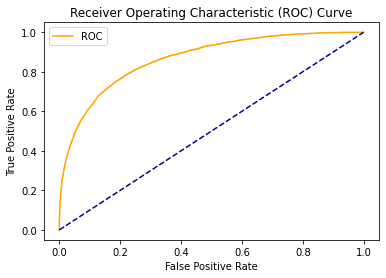

In [124]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

## Recursive Feature Elimination

In [127]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
rfecv=RFECV(estimator=dt,step=1,scoring='neg_mean_squared_error',cv=4,verbose=1,n_jobs=-1)
rfecv.fit(X,y)
rfecv.transform(X)
print(rfecv)
print("Optimal no of features : {}".format(rfecv.n_features_))

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)
Optimal no of features : 1


## Hyperparameter Optimization

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma='auto'),{"C":[1,2,3,4],"kernel":["rbf","linear"]},cv=5,return_train_score=False)
clf.fit(X,y)
df=pd.DataFrame(clf.cv_results_)
df